In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

data = {'eng': [10,30,50,70],
        'kor': [20,40,60,80],
        'math': [90,50,20,70]}
df = pd.DataFrame(data, index = ['a','b','c','d'])

df.sort_values(by='math')

df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


### 데이터프레임 통계함수 디폴트axis=0 (컬럼별), axis=1 (행,index)

In [13]:
# numpy : axis = None(1차원으로풀어서), 0(컬럼), 1(행별)
# dataframe : axis= None == 0, 1(행별)
df.sum(axis=0) # axis = None
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [12]:
df.sum(axis=1)
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [18]:
df.sum().sum()

590

In [24]:
np.sum(df.sum())

590

In [25]:
df.values.sum()

590

In [29]:
# dataframe -> series 
sr = df.unstack()
sr.index
sr.values


array([10, 30, 50, 70, 20, 40, 60, 80, 90, 50, 20, 70], dtype=int64)

In [30]:
df.unstack().sum()

590

In [31]:
df.mean()

eng     40.0
kor     50.0
math    57.5
dtype: float64

In [32]:
df.mean(axis=1).round(2)

a    40.00
b    40.00
c    43.33
d    73.33
dtype: float64

In [33]:
df.mean().mean()

49.166666666666664

df.values.mean()

In [37]:
# colum 별 가장 큰값
df.max()
df.max(axis=1)
df.min()

eng     10
kor     20
math    20
dtype: int64

In [39]:
print(df.idxmax())
print(df)

eng     d
kor     d
math    a
dtype: object
   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
d   70   80    70


In [44]:
print(df)
print(df.median())
print(df.median(axis=1))
print(df.unstack().sort_values())
# 전체의 중간값 : 1차원으로 푼 다음의 중간값
print(df.unstack().median())
print(np.median(df.values))

   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
d   70   80    70
eng     40.0
kor     50.0
math    60.0
dtype: float64
a    20.0
b    40.0
c    50.0
d    70.0
dtype: float64
eng   a    10
kor   a    20
math  c    20
eng   b    30
kor   b    40
eng   c    50
math  b    50
kor   c    60
eng   d    70
math  d    70
kor   d    80
math  a    90
dtype: int64
50.0
50.0


In [46]:
df.std() # 표준편차

eng     25.819889
kor     25.819889
math    29.860788
dtype: float64

In [47]:
# 해당 등별 점수
df.quantile([0.25, 0.5, 0.75])

,eng,kor,math
0.25,25.0,35.0,42.5
0.50,40.0,50.0,60.0
0.75,55.0,65.0,75.0


In [49]:
df.count()


eng     4
kor     4
math    4
dtype: int64

In [50]:
df.describe()

,eng,kor,math
count,4.000000,4.000000,4.000000
mean,40.000000,50.000000,57.500000
std,25.819889,25.819889,29.860788
min,10.000000,20.000000,20.000000
25%,25.000000,35.000000,42.500000
50%,40.000000,50.000000,60.000000
75%,55.000000,65.000000,75.000000
max,70.000000,80.000000,90.000000


In [52]:
df.head(2)

,eng,kor,math
a,10,20,90
b,30,40,50


In [53]:
df.tail(2)

,eng,kor,math
c,50,60,20
d,70,80,70


In [56]:
# kor 중 상위 2개중에
df.nlargest(2, 'kor', keep='all')

,eng,kor,math
d,70,80,70
c,50,60,20


In [58]:
def fn(v) :
    print(type(v), v)
    return v.sum()
df.apply(fn)


<class 'pandas.core.series.Series'> a    10
b    30
c    50
d    70
Name: eng, dtype: int64
<class 'pandas.core.series.Series'> a    20
b    40
c    60
d    80
Name: kor, dtype: int64
<class 'pandas.core.series.Series'> a    90
b    50
c    20
d    70
Name: math, dtype: int64


eng     160
kor     200
math    230
dtype: int64

In [61]:
# series for low
df.apply(fn, axis=1)
df.apply(lambda v:v.sum(), axis=1)

<class 'pandas.core.series.Series'> eng     10
kor     20
math    90
Name: a, dtype: int64
<class 'pandas.core.series.Series'> eng     30
kor     40
math    50
Name: b, dtype: int64
<class 'pandas.core.series.Series'> eng     50
kor     60
math    20
Name: c, dtype: int64
<class 'pandas.core.series.Series'> eng     70
kor     80
math    70
Name: d, dtype: int64


a    120
b    120
c    130
d    220
dtype: int64

In [126]:
# practice
# 국어 영어 수학점수의 평균이 70이상이면 합격 아니면 불합결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

data = {'eng': [10,30,50,70],
        'kor': [20,40,60,80],
        'math': [90,50,20,70]}
df = pd.DataFrame(data, index = ['a','b','c','d'])

df["결과"] = df.apply(lambda v:"합격" if v.mean()>=70 else "불합격", axis=1)
df
#df.mean(axis=1).apply(lambda v: '합격' if v >= 70 else '불합격')
#df['결과'] = df.apply(lambda v: "합격" if v.mean()>=70 else "불합격", axis=1)

,eng,kor,math,결과
a,10,20,90,불합격
b,30,40,50,불합격
c,50,60,20,불합격
d,70,80,70,합격


In [112]:
def fn2(v):
    if (v.mean()>=70):
        return "합격"
    else :
        return "불합격"

df["결과"] = df.apply(fn2, axis=1)
print(df)

   eng  kor  math   결과
a   10   20    90  불합격
b   30   40    50  불합격
c   50   60    20  불합격
d   70   80    70   합격


# 시각화

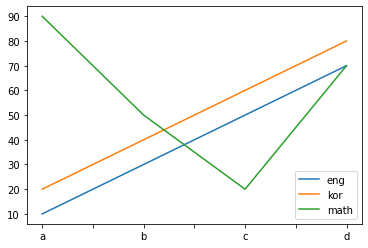

In [83]:
df.plot()
plt.show()

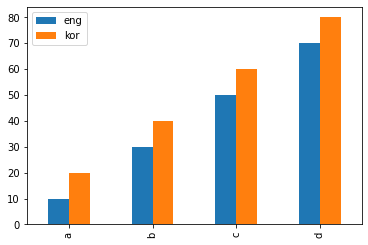

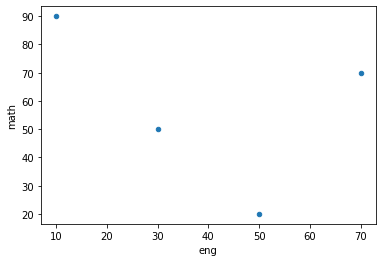

In [89]:
df.plot(kind = 'bar', y=['eng', 'kor'])
plt.show()
df.plot(kind='scatter', x='eng', y='math')
plt.show()

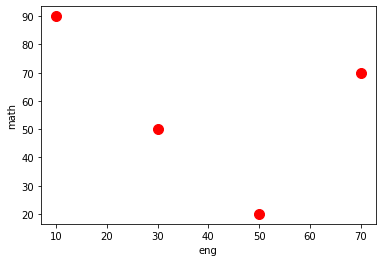

In [99]:
df.plot(kind='scatter', x = 'eng', y='math', s=100, c='r')
plt.show()

In [113]:
for n in df:
    print(n)

eng
kor
math
결과


In [117]:
for n in df.index:
    print(n)

a
b
c
d


In [136]:
for n in df.items():
    print(n)

('eng', a    10
b    30
c    50
d    70
Name: eng, dtype: int64)
('kor', a    20
b    40
c    60
d    80
Name: kor, dtype: int64)
('math', a    90
b    50
c    20
d    70
Name: math, dtype: int64)
('결과', a    불합격
b    불합격
c    불합격
d     합격
Name: 결과, dtype: object)


In [137]:
for i, sr in df.items():
    print(i, sr['a'], sr['b'], sr['c'], sr['d'])

eng 10 30 50 70
kor 20 40 60 80
math 90 50 20 70
결과 불합격 불합격 불합격 합격


In [138]:
for idx, sr in df.iterrows():
    print(idx, sr['eng'], sr['kor'], sr['math'])

a 10 20 90
b 30 40 50
c 50 60 20
d 70 80 70
